Desafio 34: Consumo de Energia Residencial

📂 Dataset: Registros mensais de consumo de energia elétrica por residência.
Colunas: Residencia, Mês, Consumo_kWh, Bandeira_Tarifária, Valor_Pago

🎯 Tarefas:

    Trate os dados ausentes e incorretos nas colunas Consumo_kWh e Valor_Pago.

    Qual a média de consumo (kWh) por residência no ano?

    Qual foi o mês com maior consumo total?

    Há variação no valor pago conforme a Bandeira_Tarifária? (Utilize média e mediana).

    Crie um gráfico de linha mostrando o consumo total por mês.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("dia_34_consumo_energia.csv")
df

,Residencia,Mês,Consumo_kWh,Bandeira_Tarifária,Valor_Pago
0,Residencia_17,2024-08,281.4,Vermelha,339.64
1,Residencia_24,2024-09,263.4,Vermelha,543.54
2,Residencia_33,2024-12,359.8,Verde,577.84
3,Residencia_41,2024-06,327.1,Amarela,363.04
4,Residencia_23,2024-12,310.0,Verde,599.17
...,...,...,...,...,...
295,Residencia_21,2024-10,280.7,Verde,706.61
296,Residencia_49,2024-01,340.7,Amarela,430.81
297,Residencia_15,2024-02,424.1,Vermelha,172.11
298,Residencia_5,2024-04,181.2,Verde,187.28


In [12]:
#Trate os dados ausentes e incorretos nas colunas Consumo_kWh e Valor_Pago.
df["Consumo_kWh"] = pd.to_numeric(df["Consumo_kWh"], errors="coerce")
df["Consumo_kWh"] = df["Consumo_kWh"].fillna(
    df.groupby("Bandeira_Tarifária")["Consumo_kWh"].transform("mean")
)

df["Valor_Pago"] = pd.to_numeric(df["Valor_Pago"], errors="coerce")
df["Valor_Pago"] = df["Valor_Pago"].fillna(df["Valor_Pago"].mean())

In [29]:
#Qual a média de consumo (kWh) por residência no ano?
kWhResidencia = df.groupby(["Residencia", "Mês"])["Consumo_kWh"].sum().mean().round(2)
print(kWhResidencia)

438.97


In [35]:
#Qual foi o mês com maior consumo total?
df["Mês"] = pd.to_datetime(df["Mês"])
df["AnoMes"] = df["Mês"].dt.strftime("%b")
consumoMesTotal = df.groupby("AnoMes")["Consumo_kWh"].sum().sort_values(ascending=False)
print(consumoMesTotal.idxmax())

Nov


In [36]:
#Há variação no valor pago conforme a Bandeira_Tarifária? (Utilize média e mediana).
varicaoBandeira = df.groupby("Bandeira_Tarifária")["Valor_Pago"].agg(["mean", "median"]).round(2)
print(varicaoBandeira)

                      mean  median
Bandeira_Tarifária                
Amarela             481.89  476.51
Verde               443.62  444.47
Vermelha            471.80  482.78


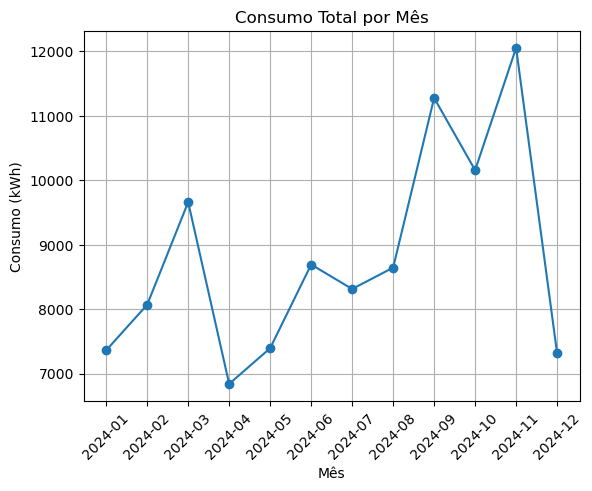

In [39]:
#Crie um gráfico de linha mostrando o consumo total por mês.
df["AnoMes"] = df["Mês"].dt.to_period("M").astype(str)
consumoMesTotal = df.groupby("AnoMes")["Consumo_kWh"].sum()

plt.plot(consumoMesTotal.index, consumoMesTotal.values, marker='o')
plt.title("Consumo Total por Mês")
plt.xlabel("Mês")
plt.ylabel("Consumo (kWh)")
plt.grid(True)
plt.xticks(rotation=45)
plt.show()